### Preprocesamiento del dataframe que vamos a usar para el testeo (los hice en archivos separados por un motivo de prolijidad)

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [230]:
 #Ingestamos la data que tenemos en un csv
df_test = pd.read_csv('hospitalizaciones_test.csv')
df_test.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324


##### Exploración del dataframe que tenemos, un pantallazo del mismo

In [6]:
#Eliminamos los duplicados, aunque verificamos que no hay ninguno.
df_test.duplicated().sum()
df_test.drop_duplicates(inplace=True)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [7]:
df_test.isna().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
dtype: int64

In [8]:
df_test.columns = ['habitaciones_disp', 'area', 'codigo ', 'doctor','personal_disp','id_paciente','edad','genero','tipo_ingreso','gravedad','condiciones','visitas','seguro','deposito']

### Distribucion de las variables numericas

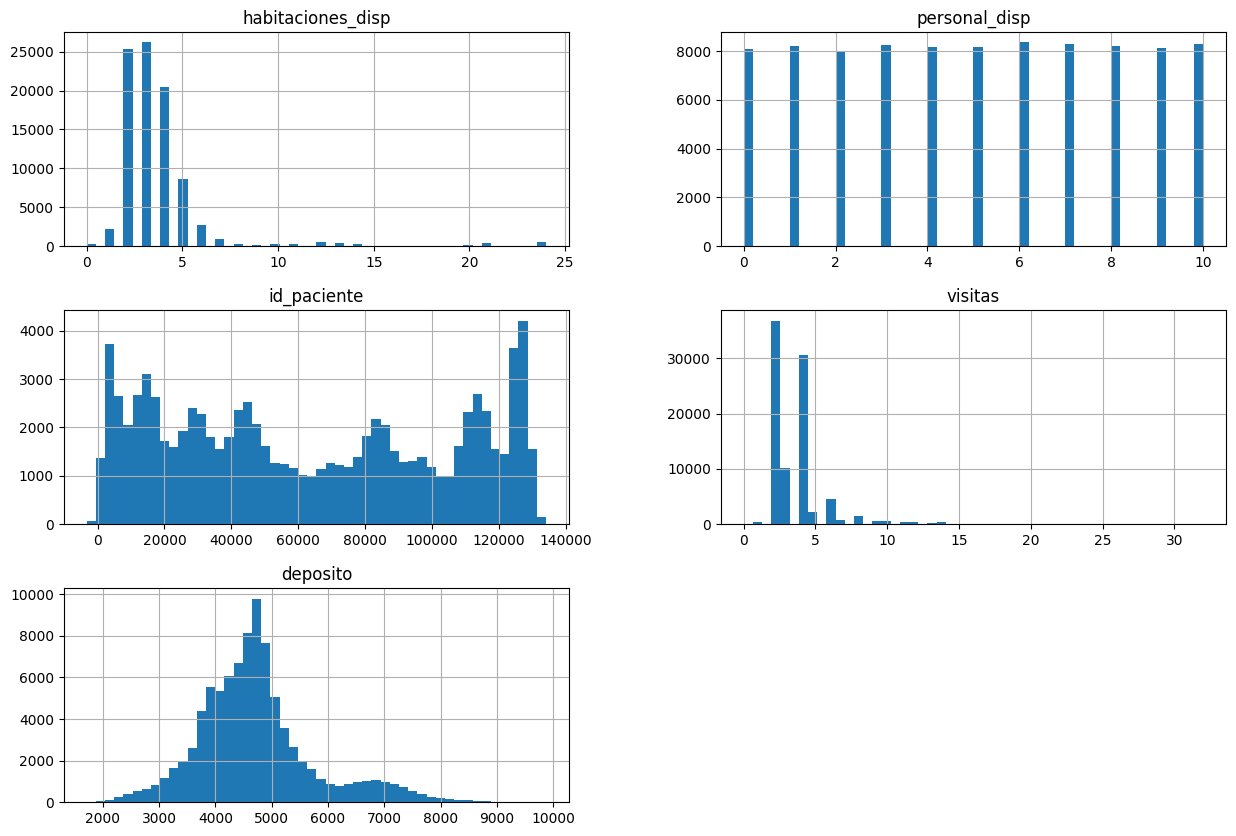

In [14]:
#Histogramas de estas variables, estableciendo 50 intervalos(bins=50) y el tamaño con figsize
df_test.hist(bins=50, figsize=(15,10))
plt.show()

#### Normalizacion de la data

In [17]:
#Convertimos la variable seguro en 0 si no tiene seguro, y en 1 si tiene seguro.
df_test['seguro'] = np.where(df_test['seguro'] == 'Yes', '1', '0')
df_test.head(4)

,habitaciones_disp,area,codigo,doctor,personal_disp,id_paciente,edad,genero,tipo_ingreso,gravedad,condiciones,visitas,seguro,deposito
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,0,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,1,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,0,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,1,3987.033318


In [19]:
#Utilizamos labelEncoder para algunas variables
le = LabelEncoder()

df_test['area'] = le.fit_transform(df_test['area'])
df_test['doctor'] = le.fit_transform(df_test['doctor'])

In [20]:
#Utilizamos OrdinalEncoder para otras
# Creamos el codificador, y le asignamos un orden a las variables
encoder = OrdinalEncoder(categories=[['Minor','Moderate', 'Extreme']])
encoder_edad = OrdinalEncoder(categories=[['0-10','11-20', '21-30', '31-40' ,'41-50' ,'51-60', '61-70', '71-80','81-90', '91-100']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df_test[["gravedad"]])
encoder_edad.fit(df_test[["edad"]])
df_test["gravedad_enc"] = encoder.transform(df_test[["gravedad"]])
df_test["edad_enc"] = encoder_edad.transform(df_test[["edad"]])

In [22]:
#Elimino las variables que a mi parecer van a afectar mi analisis. Dificil que el id de un paciente pueda influir en la duracion de su estadia
df_test.drop(df_test.columns[[2,5,6,7,8,9,10]], axis = 1, inplace=True)

In [23]:
#Lo guardamos en un csv que vamos a utilizar en el principal notebook
df_test.to_csv('df_test_proc.csv')